In [1]:
from FeatureExtraction import extract_boxes, extract_sizes, extract_moments
from pytesseract import Output
from PIL import Image
import pytesseract as pt
pt.pytesseract.tesseract_cmd = 'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'
from pdf2image import convert_from_path
import numpy as np
import matplotlib.pyplot as plt
import cv2
document_path = 'image.png'
from deskew import determine_skew
import imutils

def deskew(_img):
    image = _img



    angle = determine_skew(image)

    if angle is None:
        return image, 0

    #20221129: revert this code as negative angles may give bad result for classification or extraction 
    #if 0.25 < abs(angle) < 359.75:
    if 0.25 < angle < 359.75:
        returned_angle = angle
        rotated = imutils.rotate_bound(image, -angle)
    else:
        returned_angle = 0
        rotated = image
    return rotated, returned_angle


In [5]:
path = 'image.png'
img = cv2.imread(path)
img = deskew(img)[0]
im = Image.fromarray(img)
im.save('image1.png')
document_path = 'image1.png'
coordinates, elts = extract_boxes(document_path)
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img1 = cv2.threshold(img1, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
d = pt.image_to_data(img, lang='fra', output_type=Output.DICT)
n_boxes = len(d['text'])
S = []
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        S.append([x,y,w,h])
        

In [10]:
contours, hierarchy = cv2.findContours(img1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

for i in range(0,len(contours)):

    area=cv2.contourArea(contours[i])
    
    
    if area>800:

        x,y,w,h= cv2.boundingRect(contours[i])
        cropped_img = img[y:y+h, x:x+w]
        L = pt.image_to_boxes(cropped_img).split('\n')
        s=0
        for i in range(len(L)):
                if len(L[i])>0:
                    if L[i][0] in '0123456789':
                            s=s+1
        if s>20:
                
            img_name= str(i)+".jpg"
            Image.fromarray(cropped_img).save('folder\table'+ str(i+1)+'.png')

FileNotFoundError: [Errno 2] No such file or directory: 'folder/table2389.png'

564

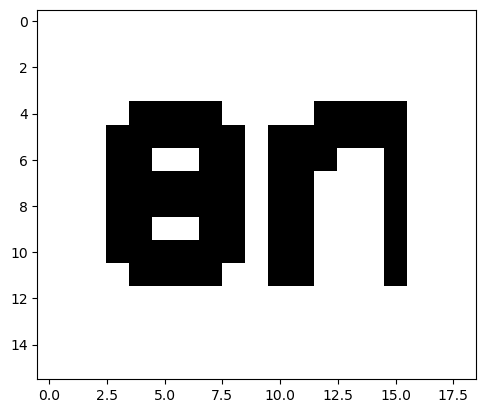

In [102]:
x,y,w,h = S[111]
plt.imshow(img[y-4:y+h+4, x-3:w+x+3], cmap='gray')
y +h

In [103]:
a = np.array(img).shape[0]
for  i in range(len(coordinates)):
    x0 = coordinates[i][0]
    y0 = a  - coordinates[i][1]
    
    if x-3<= x0 and x0<= w+x+3 and y-4 <= y0 <= y+h+4:
        print(i)

522
523


553
553


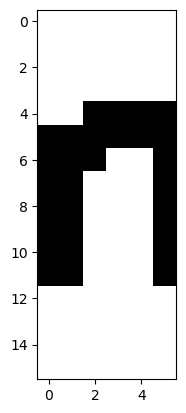

In [105]:
for i in range(522,523+1):    
    

    plt.imshow(img[a- coordinates[i][3]-4: a- coordinates[i][1]+4, coordinates[i][0]: coordinates[i][2]], cmap='gray')
    M = img[a- coordinates[i][3]-4: a- coordinates[i][1]+4, coordinates[i][0]: coordinates[i][2]]
    k = np.nonzero(np.sum(1- M/255, axis= 1)<4)[0][-1]

    print(a- coordinates[i][1]+4-k)

In [32]:
Line = np.zeros(len(elts)) 
for i in range(len(elts)):
    if elts[i] in 'abcdefhiklmnorstuvwxz':
        crop = img[a- coordinates[i][3] -4: a- coordinates[i][1]+4, coordinates[i][0]: coordinates[i][2]]
        vect = list(np.sum(crop, axis=1))
        m,p = crop.shape
        j = m-1
        if len(vect)>7:
            while vect[-1]<3:
                vect.pop(-1)
                j = j-1
                if len(vect)==0:
                    break
        
        Line[i] = coordinates[i][3]+j


In [35]:
Line, coordinates[:,3]

(array([   0., 1601., 1587., ...,   71.,   67.,   67.]),
 array([1570, 1570, 1563, ...,   55,   53,   53]))

In [37]:
from deskew import determine_skew
import imutils

def deskew(_img):
    image = _img



    angle = determine_skew(image)

    if angle is None:
        return image, 0

    #20221129: revert this code as negative angles may give bad result for classification or extraction 
    #if 0.25 < abs(angle) < 359.75:
    if 0.25 < angle < 359.75:
        returned_angle = angle
        rotated = imutils.rotate_bound(image, -angle)
    else:
        returned_angle = 0
        rotated = image
    return rotated, returned_angle


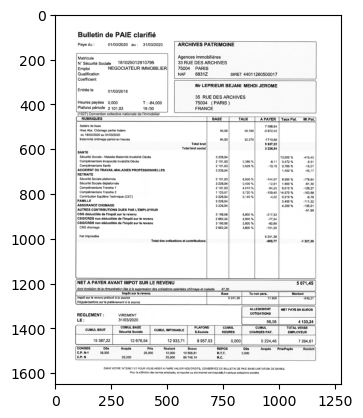

In [45]:
plt.imshow(deskew(img)[0],cmap='gray')